# PCA

In [134]:
# package load
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import font_manager, rc
import collections
%matplotlib inline

# 차트에서 한글 출력을 위한 설정
import platform
your_os = platform.system()
if your_os == 'Linux':
    rc('font', family='NanumGothic')
elif your_os == 'Windows':
    ttf = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=ttf).get_name()
    rc('font', family=font_name)
elif your_os == 'Darwin':
    rc('font', family='AppleGothic')
rc('axes', unicode_minus=False)

In [135]:
data = pd.read_csv('설문조사_최종데이터.csv', encoding = 'cp949').fillna('x')

In [136]:
data

,타임스탬프,"귀하의 나이는 어떻게 되시나요? (ex : 20, 25, 35 ...)",귀하의 성별은 무엇인가요?,귀하는 어떤 일을 하십니까?,귀하가 함께 거주하는 사람은 누구인가요?,귀하의 취미는 무엇인가요?,다음 중 귀하가 선호하는 음료는 무엇인가요? (최대 2개 선택),"신제품이나 트렌디한 음료를 대체로 경험해보시나요? (ex 버블티, 아샷추, 달고나 커피 등)",평소 본인의 업무량(학업량)이 많다고 생각하십니까?,평소 음식/음료를 섭취할 때 건강을 고려하는 편인가요?,...,해당 제품을 선호하는 이유는 무엇인가요? (최대 3개 선택).4,과채음료를 일주일에 몇 회 마시나요?,과채음료를 주로 언제 마시나요? (최대 2개 선택),과채음료를 마실 때 기대하는 요인은 무엇인가요? (복수선택),과채음료를 마실 때 우려하는 요인은 무엇인가요? (복수 선택),과채음료를 주로 구매하는 구매처는 어디인가요? (최대 2개 선택),과채음료와 주로 함께 먹는 음식은 무엇인가요?,다음 중 가장 선호하는 과채음료 제품은 무엇인가요?,해당 제품을 선호하는 이유는 무엇인가요? (최대 3개 선택).5,당첨시 상품 수령을 위한 휴대폰 번호를 입력해주세요(ex / 010-1234-5678)
0,2020. 9. 29 오후 12:51:48,26,남,학생,가족,독서,"탄산음료, 에너지음료",관심만 가진다.,그렇다.,그렇지 않다.,...,x,거의 마시지 않음,x,x,x,x,x,x,x,x
1,2020. 9. 29 오후 1:20:33,22,남,학생,가족,문화생활,탄산음료,관심만 가진다.,매우 그렇지 않다.,그렇다.,...,x,거의 마시지 않음,x,x,x,x,x,x,x,1083353792
2,2020. 9. 29 오후 1:42:40,23,남,학생,가족,운동/스포츠,"커피, 이온/스포츠음료",대체로 경험해보는 편이다.,보통이다.,그렇지 않다.,...,x,거의 마시지 않음,x,x,x,x,x,x,x,x
3,2020. 9. 29 오후 1:43:26,25,여,학생,가족,SNS,"탄산음료, 탄산수",대체로 경험해보는 편이다.,보통이다.,그렇다.,...,맛이 좋아서,거의 마시지 않음,x,x,x,x,x,x,x,1031916631
4,2020. 9. 29 오후 1:47:47,22,남,학생,가족,독서,"커피, 과채음료",관심 없다.,그렇다.,그렇지 않다.,...,x,1~2회,취침 전,맛,당분,"편의점, 마트",음료만 섭취,미닛메이드_주스류,제품 인지도가 높아서,010-3633-3114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,2020. 10. 14 오후 2:16:05,26,남,학생,1인 가구,운동/스포츠,"커피, 탄산음료",관심 없다.,그렇다.,그렇다.,...,x,거의 마시지 않음,x,x,x,x,x,x,x,010-3233-8867
368,2020. 10. 14 오후 2:18:25,24,남,학생,가족,기타,과채음료,관심 없다.,보통이다.,매우 그렇다.,...,x,1~2회,"공복 시, 업무/공부 할 때","맛, 건강, 갈증해소","당분, 치아 부식, 합성 첨가물, 기타","편의점, 카페",음료만 섭취,기타,기타,1036083926
369,2020. 10. 14 오후 3:21:15,32,남,프리랜서,가족,그림그리기/만들기,"커피, 탄산음료",항상 경험해본다.,매우 그렇지 않다.,매우 그렇지 않다.,...,x,거의 마시지 않음,x,x,x,x,x,x,x,010-5016-3736
370,2020. 10. 14 오후 3:27:18,32,남,프리랜서,가족,게임,"탄산음료, 과채음료",관심 없다.,그렇지 않다.,그렇지 않다.,...,x,3~5회,공복 시,건강,당분,"편의점, 마트",음료만 섭취,자연은_주스류,맛이 좋아서,x


In [137]:
# 데이터 정리
new_data = pd.DataFrame()
new_data['연령대'] = data['귀하의 나이는 어떻게 되시나요? (ex : 20, 25, 35 ...)'].apply(lambda x: x//10*10)
new_data['성별'] = data['귀하의 성별은 무엇인가요?']
new_data['직업'] = data['귀하는 어떤 일을 하십니까?']
new_data['거주형태'] = data['귀하가 함께 거주하는 사람은 누구인가요?']
new_data['취미'] = data['귀하의 취미는 무엇인가요?']
new_data['건강고려'] = data['평소 음식/음료를 섭취할 때 건강을 고려하는 편인가요?']
new_data['신제품선호도'] = data['신제품이나 트렌디한 음료를 대체로 경험해보시나요? (ex 버블티, 아샷추, 달고나 커피 등)']
new_data['업무량'] = data['평소 본인의 업무량(학업량)이 많다고 생각하십니까?']
new_data['커피빈도'] = data['커피를 일주일에 몇 회 마시나요?']
new_data['차빈도'] = data['차를 일주일에 몇 회 마시나요?']
new_data['탄산음료빈도'] = data['탄산음료를 일주일에 몇 회 마시나요?']
new_data['에너지음료빈도'] = data['에너지음료를 일주일에 몇 회 마시나요?']
new_data['이온/스포츠음료빈도'] = data['이온/스포츠음료를 일주일에 몇 회 마시나요?']
new_data['탄산수빈도'] = data['탄산수를 일주일에 몇 회 마시나요?']
new_data['과채음료빈도'] = data['과채음료를 일주일에 몇 회 마시나요?']

In [138]:
new_data

,연령대,성별,직업,거주형태,취미,건강고려,신제품선호도,업무량,커피빈도,차빈도,탄산음료빈도,에너지음료빈도,이온/스포츠음료빈도,탄산수빈도,과채음료빈도
0,20,남,학생,가족,독서,그렇지 않다.,관심만 가진다.,그렇다.,3~5회,거의 마시지 않음,3~5회,1~2회,거의 마시지 않음,거의 마시지 않음,거의 마시지 않음
1,20,남,학생,가족,문화생활,그렇다.,관심만 가진다.,매우 그렇지 않다.,거의 마시지 않음,거의 마시지 않음,1~2회,거의 마시지 않음,거의 마시지 않음,거의 마시지 않음,거의 마시지 않음
2,20,남,학생,가족,운동/스포츠,그렇지 않다.,대체로 경험해보는 편이다.,보통이다.,3~5회,1~2회,거의 마시지 않음,거의 마시지 않음,3~5회,거의 마시지 않음,거의 마시지 않음
3,20,여,학생,가족,SNS,그렇다.,대체로 경험해보는 편이다.,보통이다.,거의 마시지 않음,3~5회,1~2회,거의 마시지 않음,거의 마시지 않음,1~2회,거의 마시지 않음
4,20,남,학생,가족,독서,그렇지 않다.,관심 없다.,그렇다.,3~5회,거의 마시지 않음,1~2회,1~2회,거의 마시지 않음,거의 마시지 않음,1~2회
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,20,남,학생,1인 가구,운동/스포츠,그렇다.,관심 없다.,그렇다.,3~5회,거의 마시지 않음,1~2회,1~2회,거의 마시지 않음,거의 마시지 않음,거의 마시지 않음
368,20,남,학생,가족,기타,매우 그렇다.,관심 없다.,보통이다.,거의 마시지 않음,1~2회,거의 마시지 않음,거의 마시지 않음,거의 마시지 않음,거의 마시지 않음,1~2회
369,30,남,프리랜서,가족,그림그리기/만들기,매우 그렇지 않다.,항상 경험해본다.,매우 그렇지 않다.,12회 이상,거의 마시지 않음,1~2회,거의 마시지 않음,거의 마시지 않음,거의 마시지 않음,거의 마시지 않음
370,30,남,프리랜서,가족,게임,그렇지 않다.,관심 없다.,그렇지 않다.,거의 마시지 않음,거의 마시지 않음,3~5회,거의 마시지 않음,거의 마시지 않음,거의 마시지 않음,3~5회


In [139]:
OH_data = pd.DataFrame(new_data.연령대)
OH_data['성별'] = new_data.성별.replace('남', 0).replace('여', 1)
직업 = pd.get_dummies(new_data.직업)
OH_data = pd.concat([OH_data, 직업], axis = 1)
취미 = pd.get_dummies(new_data.취미)
OH_data = pd.concat([OH_data, 취미], axis = 1)

In [140]:
count_dic = {'거의 마시지 않음': 0, '1~2회' : 1, '3~5회' : 2, '6~8회':3, '9~11회':4, '12회 이상':5}
ok_dic = {'매우 그렇지 않다.':0, '그렇지 않다.':1, '보통이다.':2, '그렇다.':3, '매우 그렇다.':4}
new_dic = {'관심 없다.':0, '관심만 가진다.':1, '대체로 경험해보는 편이다.':2, '항상 경험해본다.':3}

In [141]:
OH_data['건강고려'] = new_data.건강고려.apply(lambda x: ok_dic[x])
OH_data['신제품선호도'] = new_data.신제품선호도.apply(lambda x: new_dic[x])
OH_data['업무량'] = new_data.업무량.apply(lambda x: ok_dic[x])
OH_data['커피빈도'] = new_data.커피빈도.apply(lambda x: count_dic[x])
OH_data['차빈도'] = new_data.차빈도.apply(lambda x: count_dic[x])
OH_data['탄산음료빈도'] = new_data.탄산음료빈도.apply(lambda x: count_dic[x])
OH_data['에너지음료빈도'] = new_data.에너지음료빈도.apply(lambda x: count_dic[x])
OH_data['이온/스포츠음료빈도'] = new_data['이온/스포츠음료빈도'].apply(lambda x: count_dic[x])
OH_data['탄산수빈도'] = new_data.탄산수빈도.apply(lambda x: count_dic[x])

In [142]:
ll = data['다음 중 귀하가 선호하는 음료는 무엇인가요? (최대 2개 선택)'].apply(lambda x: x.split(', '))
unique_col = pd.Series([j for i in ll for j in i]).unique()
ddd = pd.DataFrame(np.zeros(shape = (372,len(unique_col))), columns = unique_col)
for i in range(len(ll)):
    for s in ll[i]:
        ddd.loc[i, s] += 1
OH_data = pd.concat([OH_data, ddd], axis = 1)

In [143]:
OH_data

,연령대,성별,군인,무직,자영업,주부,직장인,취준생,프리랜서,학생,...,이온/스포츠음료빈도,탄산수빈도,탄산음료,에너지음료,커피,이온/스포츠음료,탄산수,과채음료,차,기타
0,20,0,0,0,0,0,0,0,0,1,...,0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20,0,0,0,0,0,0,0,0,1,...,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20,0,0,0,0,0,0,0,0,1,...,2,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,20,1,0,0,0,0,0,0,0,1,...,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,20,0,0,0,0,0,0,0,0,1,...,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,20,0,0,0,0,0,0,0,0,1,...,0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
368,20,0,0,0,0,0,0,0,0,1,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
369,30,0,0,0,0,0,0,0,1,0,...,0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
370,30,0,0,0,0,0,0,0,1,0,...,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [144]:
def sp(x):
    try:
        return x.split(', ')
    except:
        return x

def no_dup(data, OH_data, drink):
    ll = data[f'{drink}를 주로 언제 마시나요? (최대 2개 선택)'].apply(sp)
    unique_col = list(set([drink +'_'+ j for i in ll.dropna() for j in i if j not in ['x', '기타']]))
    ddd = pd.DataFrame(np.zeros(shape = (372,len(unique_col))), columns = unique_col)
    for i in range(len(ll)):
        for s in ll[i]:
            if s not in ['x', '기타']:
                cc = drink + '_' + s
                ddd.loc[i, cc] += 1
    OH_data = pd.concat([OH_data, ddd], axis = 1)
    
    return OH_data

for i in ['커피', '탄산음료', '이온/스포츠음료', '과채음료', '탄산수', '에너지음료']:
    OH_data = no_dup(data, OH_data, i)

In [145]:
def no_dup(data, OH_data, drink):
    ll = data[f'{drink}를 마실 때 기대하는 요인은 무엇인가요? (복수선택)'].apply(sp)
    unique_col = list(set([drink +'_'+ j for i in ll.dropna() for j in i if j not in ['x', '기타']]))
    ddd = pd.DataFrame(np.zeros(shape = (372,len(unique_col))), columns = unique_col)
    for i in range(len(ll)):
        for s in ll[i]:
            if s not in ['x', '기타']:
                cc = drink + '_' + s
                ddd.loc[i, cc] += 1

    OH_data = pd.concat([OH_data, ddd], axis = 1)
    
    return OH_data

for i in ['커피', '탄산음료', '이온/스포츠음료', '과채음료', '탄산수', '에너지음료']:
    OH_data = no_dup(data, OH_data, i)

In [146]:
def no_dup(data, OH_data, drink):
    ll = data[f'{drink}를 마실 때 우려하는 요인은 무엇인가요? (복수 선택)'].apply(sp)
    unique_col = list(set([drink +'_'+ j for i in ll.dropna() for j in i if j not in ['x', '기타']]))
    ddd = pd.DataFrame(np.zeros(shape = (372,len(unique_col))), columns = unique_col)
    for i in range(len(ll)):
        for s in ll[i]:
            if s not in ['x', '기타']:
                cc = drink + '_' + s
                ddd.loc[i, cc] += 1

    OH_data = pd.concat([OH_data, ddd], axis = 1)
    
    return OH_data

for i in ['커피', '탄산음료', '이온/스포츠음료', '과채음료', '탄산수', '에너지음료']:
    OH_data = no_dup(data, OH_data, i)

In [147]:
def no_dup(data, OH_data, drink):
    ll = data[f'{drink}와 주로 함께 먹는 음식은 무엇인가요?'].apply(sp)
    unique_col = list(set([drink +'_'+ j for i in ll.dropna() for j in i if j not in ['x', '기타']]))
    ddd = pd.DataFrame(np.zeros(shape = (372,len(unique_col))), columns = unique_col)
    for i in range(len(ll)):
        for s in ll[i]:
            if s not in ['x', '기타']:
                cc = drink + '_' + s
                ddd.loc[i, cc] += 1

    OH_data = pd.concat([OH_data, ddd], axis = 1)
    
    return OH_data

for i in ['커피', '탄산음료', '이온/스포츠음료', '과채음료', '탄산수', '에너지음료']:
    OH_data = no_dup(data, OH_data, i)

In [148]:
OH_data.drop('기타', axis = 1, inplace = True)

In [149]:
OH_data.shape

(372, 174)

In [150]:
[i for i in OH_data.columns]

['연령대',
 '성별',
 '군인',
 '무직',
 '자영업',
 '주부',
 '직장인',
 '취준생',
 '프리랜서',
 '학생',
 'SNS',
 '게임',
 '그림그리기/만들기',
 '독서',
 '문화생활',
 '사교모임',
 '운동/스포츠',
 '음악감상/악기연주',
 '건강고려',
 '신제품선호도',
 '업무량',
 '커피빈도',
 '차빈도',
 '탄산음료빈도',
 '에너지음료빈도',
 '이온/스포츠음료빈도',
 '탄산수빈도',
 '탄산음료',
 '에너지음료',
 '커피',
 '이온/스포츠음료',
 '탄산수',
 '과채음료',
 '차',
 '커피_업무/공부 할 때',
 '커피_공복 시',
 '커피_공복 시 ',
 '커피_식사 시',
 '커피_친목 활동',
 '커피_운동 전후',
 '탄산음료_운동 전후',
 '탄산음료_취침 전',
 '탄산음료_식사 시',
 '탄산음료_친목 활동',
 '탄산음료_공복 시',
 '탄산음료_업무/공부 할 때',
 '이온/스포츠음료_취침 전',
 '이온/스포츠음료_운동 전후',
 '이온/스포츠음료_친목 활동',
 '이온/스포츠음료_공복 시',
 '이온/스포츠음료_업무/공부 할 때',
 '이온/스포츠음료_식사 시',
 '과채음료_업무/공부 할 때',
 '과채음료_취침 전',
 '과채음료_운동 전후',
 '과채음료_식사 시',
 '과채음료_공복 시',
 '과채음료_친목 활동',
 '탄산수_식사 시',
 '탄산수_공복 시',
 '탄산수_친목 활동',
 '탄산수_운동 전후',
 '탄산수_업무/공부 할 때',
 '탄산수_취침 전',
 '에너지음료_운동 전후',
 '에너지음료_취침 전',
 '에너지음료_식사 시',
 '에너지음료_친목 활동',
 '에너지음료_업무/공부 할 때',
 '에너지음료_공복 시',
 '에너지음료_업무/공부할 때',
 '커피_피로회복',
 '커피_갈증해소',
 '커피_소화촉진',
 '커피_건강',
 '커피_각성효과',
 '커피_다이어트',
 '커피_맛',
 '탄산음료_건강',
 '탄산음료_맛',
 '탄산음료_피로회

In [151]:
# 기본 데이터 분석을 위한 Library
import pandas as pd
import numpy as np

# 시각화 Library
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn에 있는 기본 데이터셋을 가져오기 위한
from sklearn import datasets

# sklearn의 PCA를 통해서 쉽게 PCA 적용가능
from sklearn.decomposition import PCA

In [19]:
from sklearn.preprocessing import StandardScaler
X_ = StandardScaler().fit_transform(OH_data, axis = 1))

In [193]:
pca = PCA(n_components=3)
drink_lda = pca.fit_transform(X_)

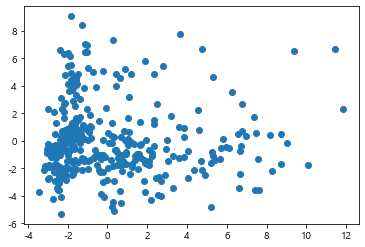

In [194]:
import matplotlib.pyplot as plt
plt.scatter(drink_lda[:,0],drink_lda[:,1])
plt.show()

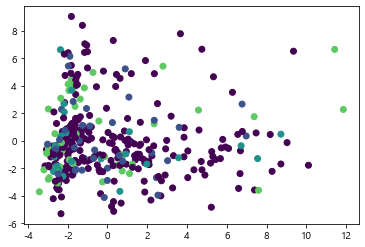

In [196]:
pc_y = np.c_[drink_lda,new_data.연령대.values]
df = pd.DataFrame(pc_y,columns=['PC1','PC2','PC3','age'])
plt.scatter(x=df['PC1'],y=df['PC2'],c=df['age'])
plt.show()

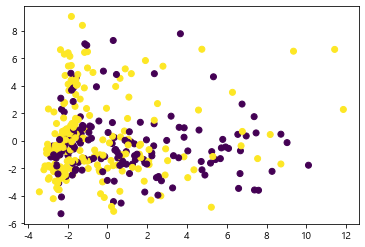

In [197]:
pc_y = np.c_[drink_lda,OH_data.성별.values]
df = pd.DataFrame(pc_y,columns=['PC1','PC2','PC3','gender'])
plt.scatter(x=df['PC1'],y=df['PC2'],c=df['gender'])
plt.show()

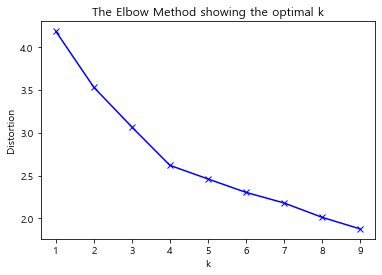

In [198]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(drink_lda)
    kmeanModel.fit(drink_lda)
    distortions.append(sum(np.min(cdist(drink_lda, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / drink_lda.shape[0])
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [199]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 4)
km.fit(drink_lda)

KMeans(n_clusters=4)

In [50]:
OH_data

,연령대,성별,군인,무직,자영업,주부,직장인,취준생,프리랜서,학생,...,과채음료_샐러드/다이어트식,과채음료_식사류,과채음료_음료만 섭취,과채음료_디저트,탄산수_디저트,탄산수_샐러드/다이어트식,탄산수_음료만 섭취,탄산수_식사류,에너지음료_식사류,에너지음료_음료만 섭취
0,20,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,20,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20,1,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,20,0,0,0,0,0,0,0,0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,20,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
368,20,0,0,0,0,0,0,0,0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
369,30,0,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
370,30,0,0,0,0,0,0,0,1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
from kmodes.kmodes import KModes
km_cao = KModes(n_clusters=3, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(OH_data.drop('연령대', axis = 1))

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 48, cost: 7620.0
Run 1, iteration: 2/100, moves: 47, cost: 7571.0
Run 1, iteration: 3/100, moves: 32, cost: 7506.0
Run 1, iteration: 4/100, moves: 49, cost: 7297.0
Run 1, iteration: 5/100, moves: 63, cost: 7165.0
Run 1, iteration: 6/100, moves: 23, cost: 7152.0
Run 1, iteration: 7/100, moves: 10, cost: 7149.0
Run 1, iteration: 8/100, moves: 0, cost: 7149.0


In [54]:
pd.Series(fitClusters_cao).value_counts()

0    186
2    147
1     39
dtype: int64

In [42]:
fitClusters_cao

array([0, 1, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [93]:
pc

array([[-0.8919862 , -0.25500628,  0.00433582],
       [ 0.54657644, -1.1505909 ,  0.6252262 ],
       [-0.6775107 ,  0.41053805,  0.640932  ],
       ...,
       [ 0.17238379,  0.11949988,  0.22690503],
       [ 0.5225369 , -0.53117675,  0.7995831 ],
       [-0.1821157 ,  1.2858789 ,  0.24662893]], dtype=float32)

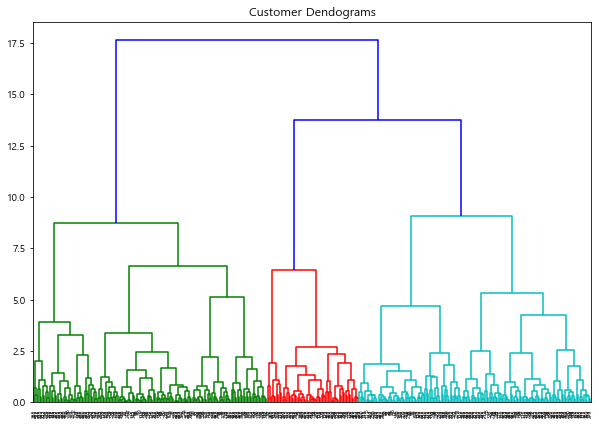

In [95]:
#data = pc

import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(pc, method='ward'))

In [97]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(pc)

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 2, 0, 1, 1, 0, 2, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 2, 1, 1, 1, 2, 0, 1, 2, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 2, 1, 1, 1, 0, 2, 2, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 2, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 2, 2, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 1, 0, 2, 0, 2,
       2, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 2, 0, 1, 0, 1, 1, 0, 0, 2, 0, 1,
       2, 1, 1, 2, 2, 1, 1, 0, 2, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       2, 0, 2, 0, 1, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 2, 0, 2, 2, 2, 2, 1, 0, 1, 1, 0, 2, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 2, 0, 1, 2, 0, 0, 1, 0, 2, 1, 0, 0, 1, 2, 2, 0, 1,
       1, 2, 2, 0, 1, 1, 2, 1, 0, 1, 0, 2, 2, 1, 0, 0, 1, 0, 1, 1, 2, 1,
       0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,

In [55]:
df = pd.DataFrame(drink_lda)
df.columns = ['x', 'y', 'z']
df['category'] = fitClusters_cao
sns.lmplot('x', 'y', data = df, fit_reg = False, hue = 'category')

NameError: name 'drink_lda' is not defined

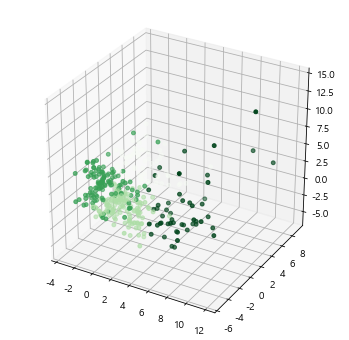

In [202]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.x, df.y, df.z,c = df.category,marker='o', s=15, cmap='Greens')
plt.show()

In [175]:
new_data['category'] = km.labels_

In [176]:
new_data.category.value_counts()

2    162
0    132
1     78
Name: category, dtype: int64

In [177]:
new_data.columns

Index(['연령대', '성별', '직업', '거주형태', '취미', '건강고려', '신제품선호도', '업무량', '커피빈도', '차빈도',
       '탄산음료빈도', '에너지음료빈도', '이온/스포츠음료빈도', '탄산수빈도', '과채음료빈도', 'category'],
      dtype='object')

In [178]:
def ratio(x):
    return x/sum(x)
def stack_ratio(new_data, i, v, seq):
    df = pd.pivot_table(data = new_data, index = i, columns = 'category', values = v, aggfunc='count').fillna(0).agg(ratio).T
    df = df[seq]
    ax = df.plot(kind='bar', stacked=True, title= f"그룹 별 {i} 비율(%)", rot=0)
    
    for p in ax. patches:
        left, bottom, width, height = p.get_bbox().bounds
        ax.annotate("%.1f"%(height*100), xy=(left+width/2, bottom+height/2), ha='center', va='center')
    plt.sca(ax)
    plt.legend( ncol=1, loc='center right',bbox_to_anchor=(1.4,0.5), scatterpoints=1 )
    plt.box(False)

In [179]:
new_data['나이'] = data['귀하의 나이는 어떻게 되시나요? (ex : 20, 25, 35 ...)']

In [180]:
new_data.groupby('category').나이.mean()

category
0    28.386364
1    34.500000
2    28.370370
Name: 나이, dtype: float64

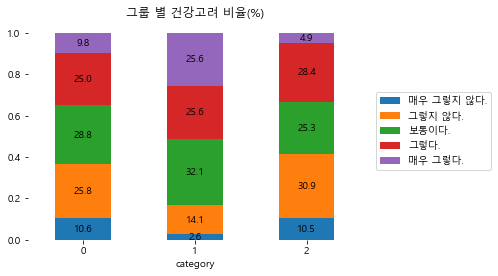

In [181]:
stack_ratio(new_data, '건강고려', '성별', ['매우 그렇지 않다.', '그렇지 않다.', '보통이다.', '그렇다.', '매우 그렇다.'])

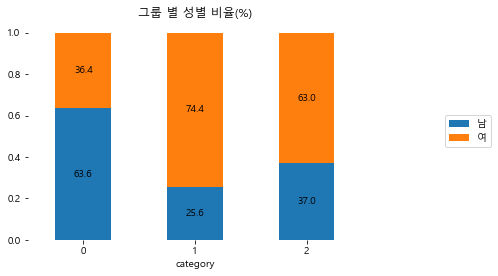

In [182]:
stack_ratio(new_data, '성별', '연령대', ['남', '여'])

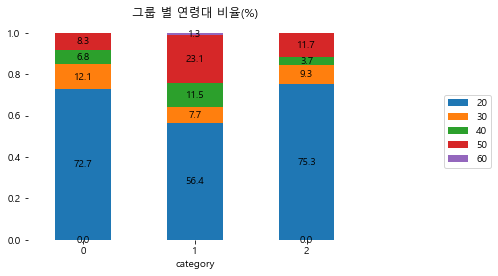

In [183]:
stack_ratio(new_data, '연령대', '직업', [20,30,40,50, 60])

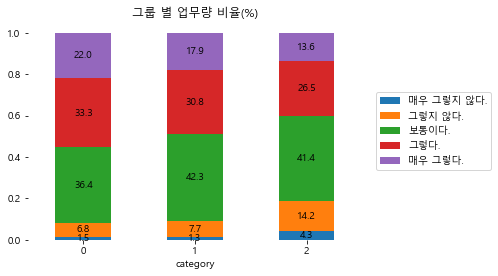

In [184]:
stack_ratio(new_data, '업무량', '성별', ['매우 그렇지 않다.', '그렇지 않다.', '보통이다.', '그렇다.', '매우 그렇다.'])

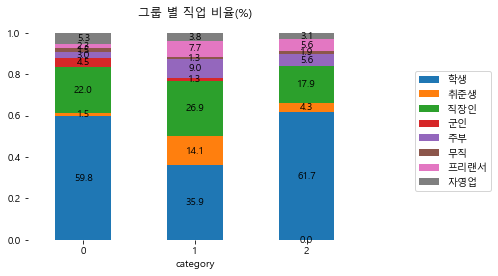

In [185]:
stack_ratio(new_data, '직업', '성별', ['학생', '취준생', '직장인', '군인', '주부', '무직', '프리랜서', '자영업'])

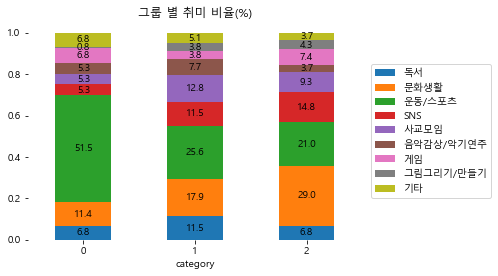

In [186]:
stack_ratio(new_data, '취미', '성별', ['독서', '문화생활', '운동/스포츠', 'SNS', '사교모임', '음악감상/악기연주', '게임',
       '그림그리기/만들기', '기타'])

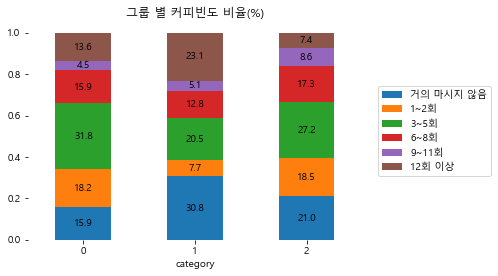

In [187]:
stack_ratio(new_data, '커피빈도', '성별', ['거의 마시지 않음', '1~2회','3~5회', '6~8회', '9~11회','12회 이상'])

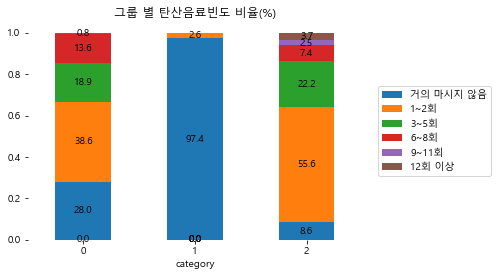

In [188]:
stack_ratio(new_data, '탄산음료빈도', '성별', ['거의 마시지 않음', '1~2회','3~5회', '6~8회', '9~11회','12회 이상'])

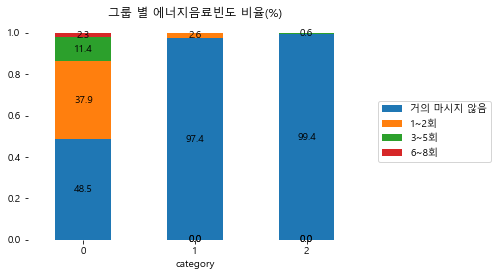

In [189]:
stack_ratio(new_data, '에너지음료빈도', '성별', ['거의 마시지 않음', '1~2회','3~5회', '6~8회'])

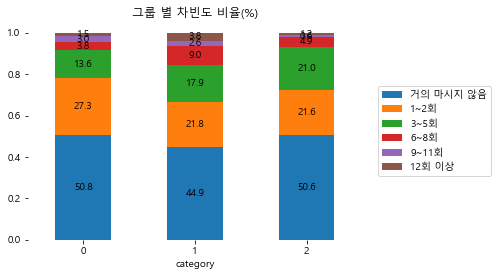

In [190]:
stack_ratio(new_data, '차빈도', '성별', ['거의 마시지 않음', '1~2회','3~5회', '6~8회', '9~11회','12회 이상'])

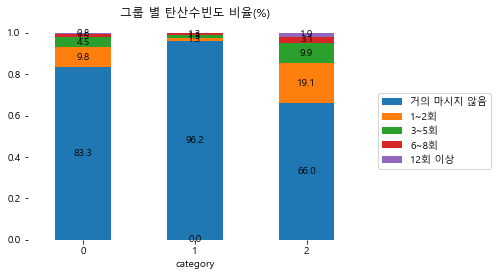

In [191]:
stack_ratio(new_data, '탄산수빈도', '성별', ['거의 마시지 않음', '1~2회','3~5회', '6~8회','12회 이상'])

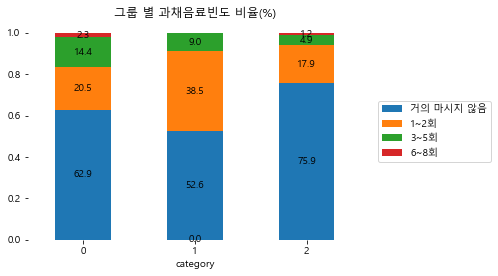

In [192]:
stack_ratio(new_data, '과채음료빈도', '성별', ['거의 마시지 않음', '1~2회','3~5회', '6~8회'])

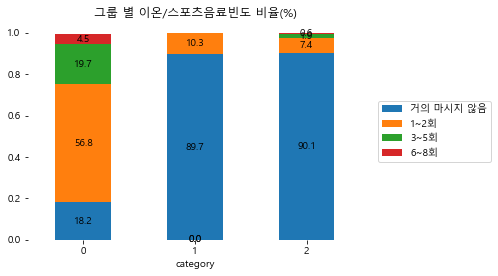

In [193]:
stack_ratio(new_data, '이온/스포츠음료빈도', '성별', ['거의 마시지 않음', '1~2회','3~5회', '6~8회'])

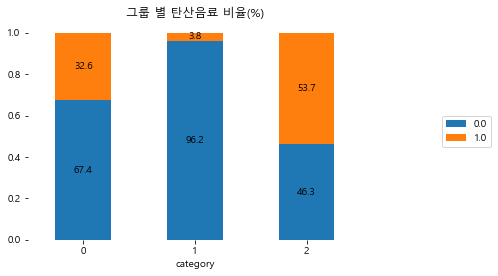

In [194]:
new_data[['탄산음료', '에너지음료', '커피', '과채음료', '탄산수', '이온/스포츠음료']]= OH_data[['탄산음료', '에너지음료', '커피', '과채음료', '탄산수', '이온/스포츠음료']]
stack_ratio(new_data, '탄산음료', '성별', [0, 1])

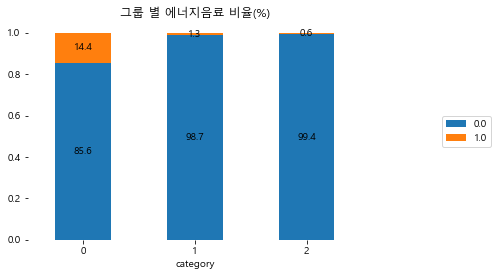

In [195]:
stack_ratio(new_data, '에너지음료', '성별', [0, 1])

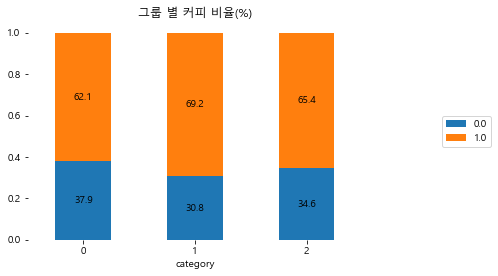

In [196]:
stack_ratio(new_data, '커피', '성별', [0, 1])

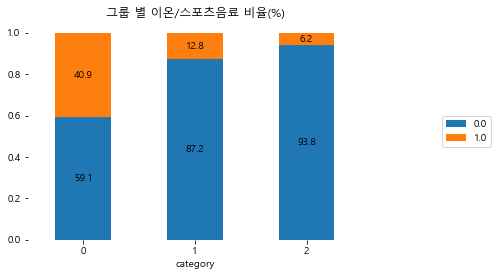

In [197]:
stack_ratio(new_data, '이온/스포츠음료', '성별', [0, 1])

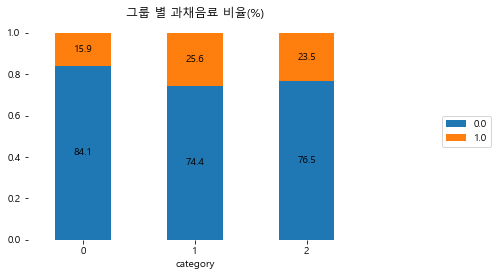

In [198]:
stack_ratio(new_data, '과채음료', '성별', [0, 1])

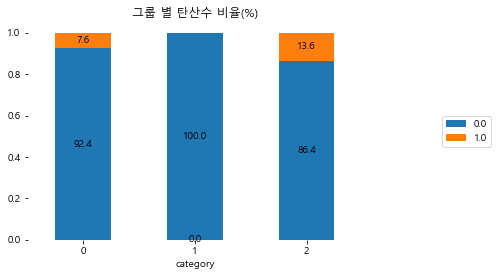

In [199]:
stack_ratio(new_data, '탄산수', '성별', [0, 1])

In [200]:
[i for i in OH_data.columns]

['연령대',
 '성별',
 '군인',
 '무직',
 '자영업',
 '주부',
 '직장인',
 '취준생',
 '프리랜서',
 '학생',
 'SNS',
 '게임',
 '그림그리기/만들기',
 '독서',
 '문화생활',
 '사교모임',
 '운동/스포츠',
 '음악감상/악기연주',
 '건강고려',
 '신제품선호도',
 '업무량',
 '커피빈도',
 '차빈도',
 '탄산음료빈도',
 '에너지음료빈도',
 '이온/스포츠음료빈도',
 '탄산수빈도',
 '탄산음료',
 '에너지음료',
 '커피',
 '이온/스포츠음료',
 '탄산수',
 '과채음료',
 '차',
 '커피_업무/공부 할 때',
 '커피_공복 시',
 '커피_공복 시 ',
 '커피_식사 시',
 '커피_친목 활동',
 '커피_운동 전후',
 '탄산음료_운동 전후',
 '탄산음료_취침 전',
 '탄산음료_식사 시',
 '탄산음료_친목 활동',
 '탄산음료_공복 시',
 '탄산음료_업무/공부 할 때',
 '이온/스포츠음료_취침 전',
 '이온/스포츠음료_운동 전후',
 '이온/스포츠음료_친목 활동',
 '이온/스포츠음료_공복 시',
 '이온/스포츠음료_업무/공부 할 때',
 '이온/스포츠음료_식사 시',
 '과채음료_업무/공부 할 때',
 '과채음료_취침 전',
 '과채음료_운동 전후',
 '과채음료_식사 시',
 '과채음료_공복 시',
 '과채음료_친목 활동',
 '탄산수_식사 시',
 '탄산수_공복 시',
 '탄산수_친목 활동',
 '탄산수_운동 전후',
 '탄산수_업무/공부 할 때',
 '탄산수_취침 전',
 '에너지음료_운동 전후',
 '에너지음료_취침 전',
 '에너지음료_식사 시',
 '에너지음료_친목 활동',
 '에너지음료_업무/공부 할 때',
 '에너지음료_공복 시',
 '에너지음료_업무/공부할 때',
 '커피_피로회복',
 '커피_갈증해소',
 '커피_소화촉진',
 '커피_건강',
 '커피_각성효과',
 '커피_다이어트',
 '커피_맛',
 '탄산음료_건강',
 '탄산음료_맛',
 '탄산음료_피로회

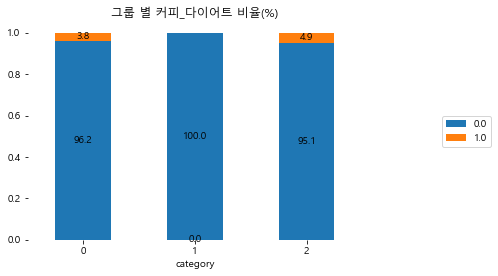

In [201]:
new_data[['커피_다이어트',
 '커피_건강',
 '커피_갈증해소',
 '커피_맛',
 '커피_소화촉진',
 '커피_피로회복',
 '커피_각성효과',]]= OH_data[['커피_다이어트',
 '커피_건강',
 '커피_갈증해소',
 '커피_맛',
 '커피_소화촉진',
 '커피_피로회복',
 '커피_각성효과',]]
stack_ratio(new_data, '커피_다이어트', '성별', [0, 1])

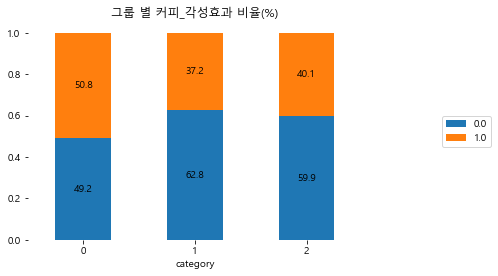

In [202]:
stack_ratio(new_data, '커피_각성효과', '성별', [0, 1])

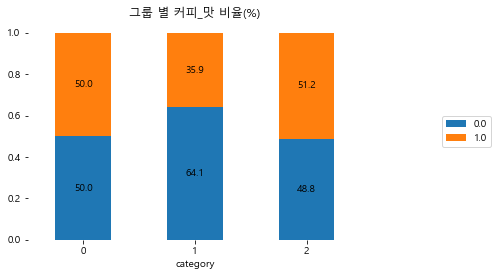

In [203]:
stack_ratio(new_data, '커피_맛', '성별', [0, 1])

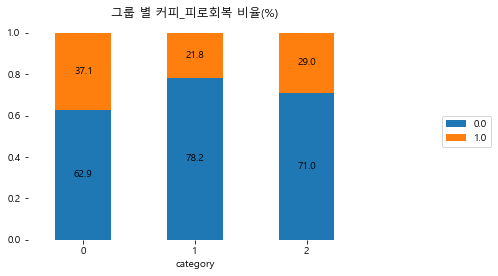

In [204]:
stack_ratio(new_data, '커피_피로회복', '성별', [0, 1])

In [ ]:
new_data[['탄산음료_운동 전후',
 '탄산음료_취침 전',
 '탄산음료_식사 시',
 '탄산음료_친목 활동',
 '탄산음료_공복 시',]]
stack_ratio(new_data, '커피_다이어트', '성별', [0, 1])

# 임베딩

In [152]:
OH_data

,연령대,성별,군인,무직,자영업,주부,직장인,취준생,프리랜서,학생,...,과채음료_샐러드/다이어트식,과채음료_식사류,과채음료_음료만 섭취,과채음료_디저트,탄산수_디저트,탄산수_샐러드/다이어트식,탄산수_음료만 섭취,탄산수_식사류,에너지음료_식사류,에너지음료_음료만 섭취
0,20,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,20,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20,1,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,20,0,0,0,0,0,0,0,0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,20,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
368,20,0,0,0,0,0,0,0,0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
369,30,0,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
370,30,0,0,0,0,0,0,0,1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [153]:
not_OHE = ['연령대','성별', '건강고려', '신제품선호도', '업무량', '커피빈도', '차빈도', '탄산음료빈도', '에너지음료빈도', '이온/스포츠음료빈도', '탄산수빈도']
OHE = OH_data.columns.difference(not_OHE)
emb_data = OH_data.copy()
emb_data_not_OHE = OH_data[not_OHE]
emb_data_OHE = OH_data[OHE]

In [154]:
for i in range(len(not_OHE)):
    col = not_OHE[i]
    emb_data_not_OHE[col] = emb_data_not_OHE[col].apply(lambda x: col + '_' +str(x))
emb_data_not_OHE['성별'] = emb_data_not_OHE['성별'].replace('성별_0', '남').replace('성별_1', '여')
emb_data_not_OHE['연령대'] = emb_data_not_OHE['연령대'].apply(lambda x: x.split('_')[1])
emb_data[not_OHE] = emb_data_not_OHE.values

C:\Users\82106\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\82106\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\82106\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [155]:
for i in range(len(OHE)):
    col = OHE[i]
    if '_' in col:
        ss = np.array([col.split('_') if i == 1 else None for i in OH_data[col]])
    else:
        ss = np.array([col if i == 1 else None for i in OH_data[col]])
    emb_data_OHE[col] = ss
emb_data[OHE] = emb_data_OHE.values

C:\Users\82106\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [156]:
emb_data

,연령대,성별,군인,무직,자영업,주부,직장인,취준생,프리랜서,학생,...,과채음료_샐러드/다이어트식,과채음료_식사류,과채음료_음료만 섭취,과채음료_디저트,탄산수_디저트,탄산수_샐러드/다이어트식,탄산수_음료만 섭취,탄산수_식사류,에너지음료_식사류,에너지음료_음료만 섭취
0,20,남,None,None,None,None,None,None,None,학생,...,None,None,None,None,None,None,None,None,None,"[에너지음료, 음료만 섭취]"
1,20,남,None,None,None,None,None,None,None,학생,...,None,None,None,None,None,None,None,None,None,None
2,20,남,None,None,None,None,None,None,None,학생,...,None,None,None,None,None,None,None,None,None,None
3,20,여,None,None,None,None,None,None,None,학생,...,None,None,None,None,None,None,"[탄산수, 음료만 섭취]",None,None,None
4,20,남,None,None,None,None,None,None,None,학생,...,None,None,"[과채음료, 음료만 섭취]",None,None,None,None,None,None,"[에너지음료, 음료만 섭취]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,20,남,None,None,None,None,None,None,None,학생,...,None,None,None,None,None,None,None,None,None,"[에너지음료, 음료만 섭취]"
368,20,남,None,None,None,None,None,None,None,학생,...,None,None,"[과채음료, 음료만 섭취]",None,None,None,None,None,None,None
369,30,남,None,None,None,None,None,None,프리랜서,None,...,None,None,None,None,None,None,None,None,None,None
370,30,남,None,None,None,None,None,None,프리랜서,None,...,None,None,"[과채음료, 음료만 섭취]",None,None,None,None,None,None,None


In [157]:
import random
emb = []
embb = []
for i in emb_data.values:
    i_copy = list(i)
    emb2 = []
    i_copy += [emb_data.values[0][0] for i_copy in range(5)] + [emb_data.values[0][1] for i_copy in range(5)]
    random.shuffle(i_copy)
    for j in i_copy:
        if type(j) == list:
            for s in j:
                emb2.append(s)
        elif j != None:
            emb2.append(j)
    emb.append(emb2 + emb2 + emb2)
    embb.append(emb2)

In [158]:
embb[0]

['커피',
 '맛',
 '에너지음료',
 '맛',
 '에너지음료',
 '커피',
 '갈증해소',
 '커피',
 '디저트',
 '20',
 '20',
 '신제품선호도_1',
 '업무량_3',
 '에너지음료',
 '당분',
 '탄산수빈도_0',
 '남',
 '20',
 '커피빈도_2',
 '남',
 '남',
 '커피',
 '업무/공부 할 때',
 '20',
 '탄산음료빈도_2',
 '탄산음료',
 '치아 부식',
 '탄산음료',
 '식사 시',
 '20',
 '에너지음료',
 '업무/공부 할 때',
 '건강고려_1',
 '탄산음료',
 '이온/스포츠음료빈도_0',
 '에너지음료',
 '칼로리',
 '남',
 '20',
 '학생',
 '에너지음료',
 '음료만 섭취',
 '에너지음료',
 '각성효과',
 '차빈도_0',
 '탄산음료',
 '당분',
 '탄산음료',
 '소화촉진',
 '독서',
 '남',
 '탄산음료',
 '식사류',
 '커피',
 '각성효과',
 '탄산음료',
 '칼로리',
 '에너지음료빈도_1',
 '커피',
 '당분',
 '커피',
 '공복 시',
 '남',
 '탄산음료',
 '맛']

In [159]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = emb, size=500, window = 100, min_count=0, workers=4)

In [160]:
model.wv.most_similar("에너지음료")

[('에너지음료빈도_2', 0.9866946935653687),
 ('에너지음료빈도_1', 0.9697886109352112),
 ('운동 전후', 0.9529542922973633),
 ('피로회복', 0.9366434812545776),
 ('음료만 섭취', 0.9180721044540405),
 ('업무/공부 할 때', 0.9136166572570801),
 ('운동/스포츠', 0.8653522729873657),
 ('이온/스포츠음료빈도_2', 0.85257488489151),
 ('각성효과', 0.8519560098648071),
 ('없음', 0.8500741720199585)]

In [161]:
model.wv[embb[0]]

array([[-0.3999534 ,  0.17647243, -0.14829041, ..., -0.19379736,
         0.60509783,  0.09209806],
       [ 0.05459093, -0.09069021, -0.02302831, ...,  0.03266734,
        -0.07766914,  0.10424285],
       [-1.0622871 , -0.15596563, -0.6575295 , ..., -0.11937171,
         0.35335878,  0.60998434],
       ...,
       [ 0.5632636 , -0.06097372,  0.09836662, ...,  0.11455064,
        -0.00933491, -0.05129582],
       [ 0.4776524 ,  0.15828766,  0.20287769, ..., -0.14074017,
        -0.32050666, -0.02715961],
       [ 0.05459093, -0.09069021, -0.02302831, ...,  0.03266734,
        -0.07766914,  0.10424285]], dtype=float32)

In [162]:
final_emb = []
for i in range(len(embb)):
    final_emb.append(list(model.wv[list(set(embb[i]))]))

In [163]:
new_mean = []
for i in range(len(final_emb)):
    zz = np.array(final_emb[i]).reshape(len(final_emb[i]), 500).mean(axis = 0)
    new_mean.append(zz)

In [164]:
len(new_mean)

372

In [165]:
final_emb = np.array(new_mean).reshape(372, 500)

In [166]:
pca = PCA(n_components=3)
pc = pca.fit_transform(final_emb)

In [167]:
pca.explained_variance_ratio_

array([0.45450044, 0.2615137 , 0.22768444], dtype=float32)

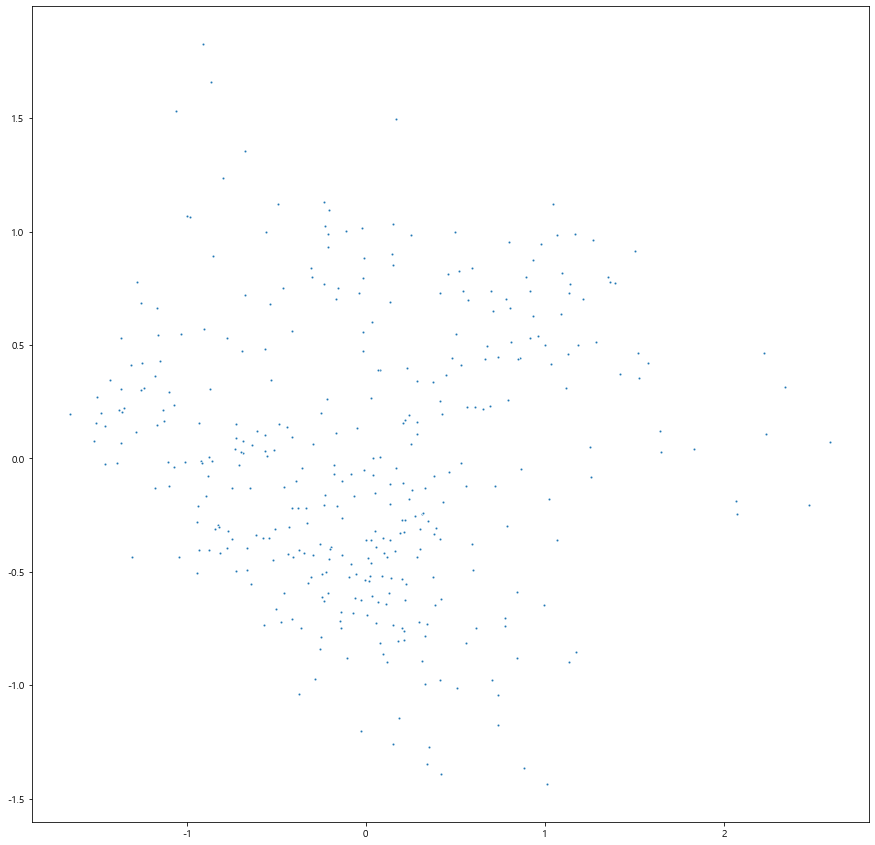

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (15, 15))
#plt.scatter(pc[:,0],pc[:,1])
sns.scatterplot(pc[:,0],pc[:,1], s = 8)

#plt.xlim(-2,0)
#plt.ylim(0,2)

plt.show()

In [169]:
pc.shape

(372, 3)

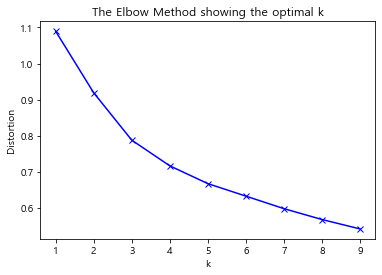

In [170]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(final_emb)
    kmeanModel.fit(final_emb)
    distortions.append(sum(np.min(cdist(final_emb, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / final_emb.shape[0])
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [171]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3)
km.fit(pc)

KMeans(n_clusters=3)

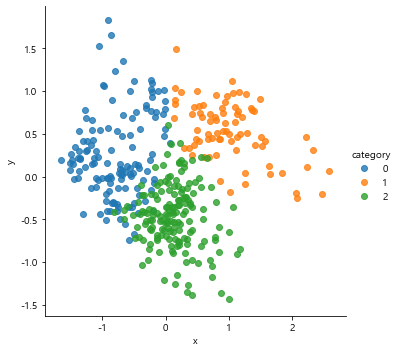

In [173]:
df = pd.DataFrame(pc)
df.columns = ['x', 'y', 'z']
df['category'] = km.labels_
sns.lmplot('x', 'y', data = df, fit_reg = False, hue = 'category')

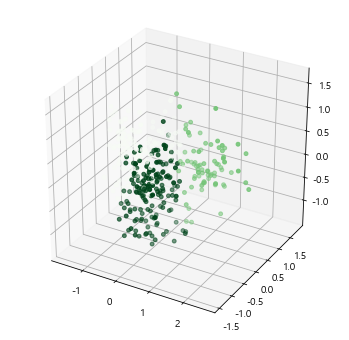

In [174]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.x, df.y, df.z,c = df.category,marker='o', s=15, cmap='Greens')
plt.show()

C:\Users\82106\anaconda3\lib\site-packages\ipykernel_launcher.py:56: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


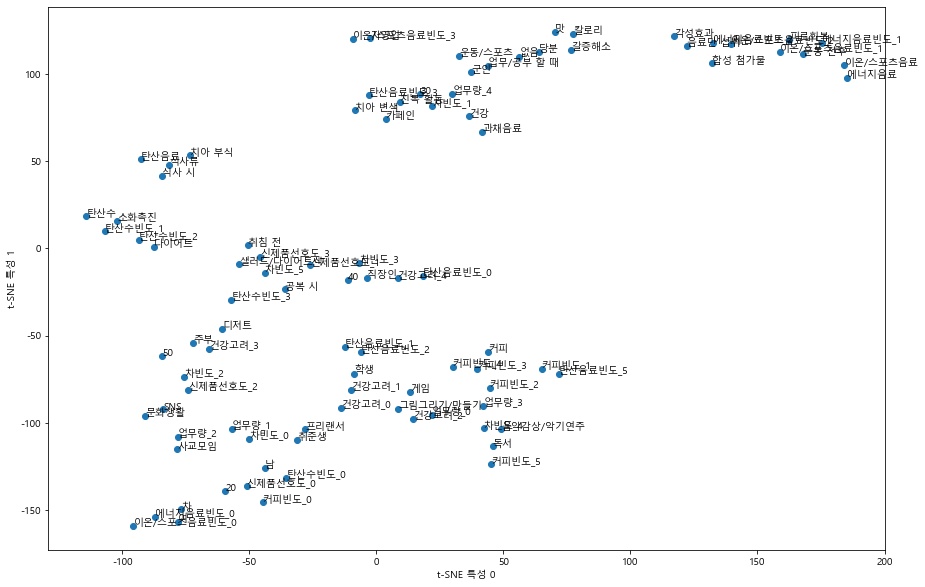

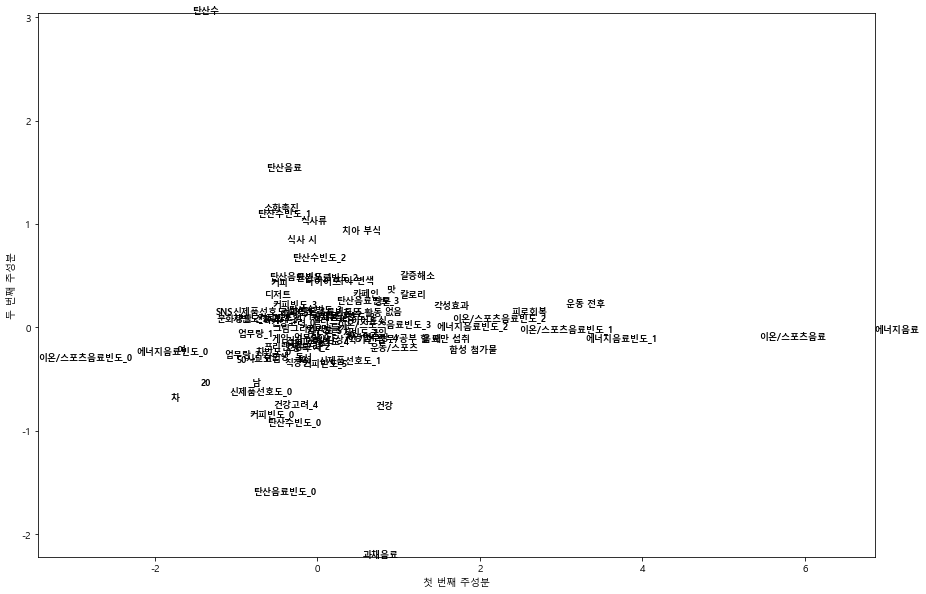

In [786]:
from sklearn.manifold import TSNE 
from sklearn.decomposition import PCA 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import pandas as pd 
from gensim.models import KeyedVectors 

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처 
mpl.rcParams['axes.unicode_minus'] = False 
plt.rc('font', family='D2Coding') 

def show_tsne(): 
    tsne = TSNE(perplexity=5, n_components=2, init='pca', n_iter=2500, random_state=23) 
    X = tsne.fit_transform(X_show) 
    df = pd.DataFrame(X, index=vocab_show, columns=['x', 'y']) 
    fig = plt.figure() 
    fig.set_size_inches(15,10) 
    ax = fig.add_subplot(1, 1, 1) 
    ax.scatter(df['x'], df['y']) 
    for word, pos in df.iterrows(): 
        ax.annotate(word, pos, fontsize=10) 
    plt.xlabel("t-SNE 특성 0") 
    plt.ylabel("t-SNE 특성 1") 
    plt.show() 
def show_pca(): 
    # PCA 모델을 생성합니다 
    pca = PCA(n_components=2) 
    pca.fit(X_show) 
    # 처음 두 개의 주성분으로 숫자 데이터를 변환합니다 
    x_pca = pca.transform(X_show) 
    plt.figure(figsize=(15,10)) 
    plt.xlim(x_pca[:, 0].min(), x_pca[:, 0].max()) 
    plt.ylim(x_pca[:, 1].min(), x_pca[:, 1].max()) 
    for i in range(len(X_show)): 
        plt.text(x_pca[i, 0], x_pca[i, 1], str(vocab_show[i]), fontdict={'weight': 'bold', 'size': 9}) 
        
    plt.xlabel("첫 번째 주성분") 
    plt.ylabel("두 번째 주성분") 
    plt.show() 
    
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False   
#그래프에서 마이너스 기호가 표시되도록 하는 설정입니다. 
vocab = list(model.wv.vocab) 
X = model[vocab] 
# sz개의 단어에 대해서만 시각화 
sz = 300
X_show = X[:sz,:] 
vocab_show = vocab[:sz] 
show_tsne() 
show_pca()

In [789]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def tsne_plot(model):
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=5, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(15, 10)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

C:\Users\82106\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


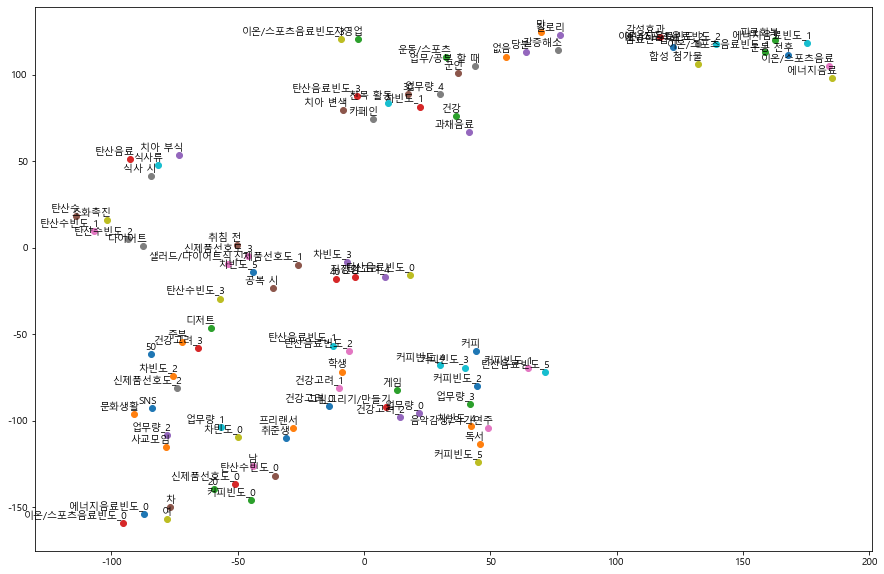

In [790]:
tsne_plot(model)

In [771]:
pca = PCA(n_components=2)
pc = pca.fit_transform(X_show)

In [791]:
labels = []
tokens = []

for word in model.wv.vocab:
    tokens.append(model[word])
    labels.append(word)

tsne_model = TSNE(perplexity=5, n_components=2, init='pca', n_iter=2500, random_state=23)
new_values = tsne_model.fit_transform(tokens)

C:\Users\82106\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


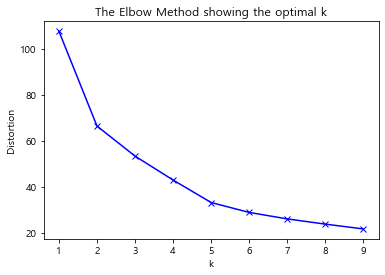

In [795]:
from scipy.spatial.distance import cdist
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(new_values)
    kmeanModel.fit(new_values)
    distortions.append(sum(np.min(cdist(new_values, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / new_values.shape[0])
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [796]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 5)
km.fit(new_values)

KMeans(n_clusters=5)

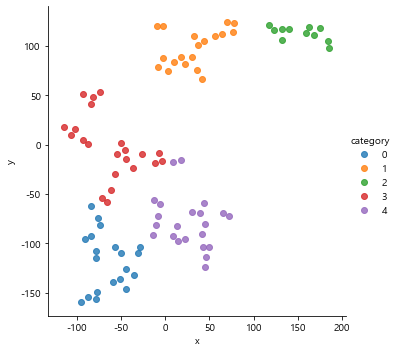

In [798]:
df = pd.DataFrame(new_values)
df.columns = ['x', 'y']
df['category'] = km.labels_
sns.lmplot('x', 'y', data = df, fit_reg = False, hue = 'category')
plt.show()

In [802]:
final = pd.DataFrame({'word':labels, 'category' : df.category})

In [803]:
final[final.category == 0]

,word,category
2,20,0
6,남,0
23,이온/스포츠음료빈도_0,0
25,탄산수빈도_0,0
28,차빈도_0,0
30,에너지음료빈도_0,0
31,문화생활,0
32,커피빈도_0,0
37,신제품선호도_2,0
44,업무량_2,0


In [804]:
final[final.category == 1]

,word,category
1,맛,1
4,칼로리,1
7,업무/공부 할 때,1
14,당분,1
17,갈증해소,1
35,치아 변색,1
41,없음,1
42,운동/스포츠,1
43,차빈도_1,1
47,카페인,1


In [805]:
final[final.category == 2]

,word,category
8,에너지음료,2
10,음료만 섭취,2
13,각성효과,2
19,에너지음료빈도_1,2
36,이온/스포츠음료,2
39,이온/스포츠음료빈도_2,2
40,운동 전후,2
52,피로회복,2
68,합성 첨가물,2
72,이온/스포츠음료빈도_1,2


In [806]:
final[final.category == 3]

,word,category
3,탄산음료,3
5,공복 시,3
9,식사류,3
15,신제품선호도_1,3
18,소화촉진,3
22,디저트,3
24,치아 부식,3
27,식사 시,3
33,건강고려_3,3
45,탄산수,3


In [807]:
final[final.category == 4]

,word,category
0,커피,4
11,독서,4
12,업무량_3,4
16,탄산음료빈도_2,4
20,커피빈도_2,4
21,학생,4
26,건강고려_1,4
29,탄산음료빈도_1,4
34,업무량_0,4
38,탄산음료빈도_0,4
